In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv("time.csv")

In [11]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the DataFrame index
df.set_index('date', inplace=True)


In [12]:
monthly_data = df.resample('M').sum()


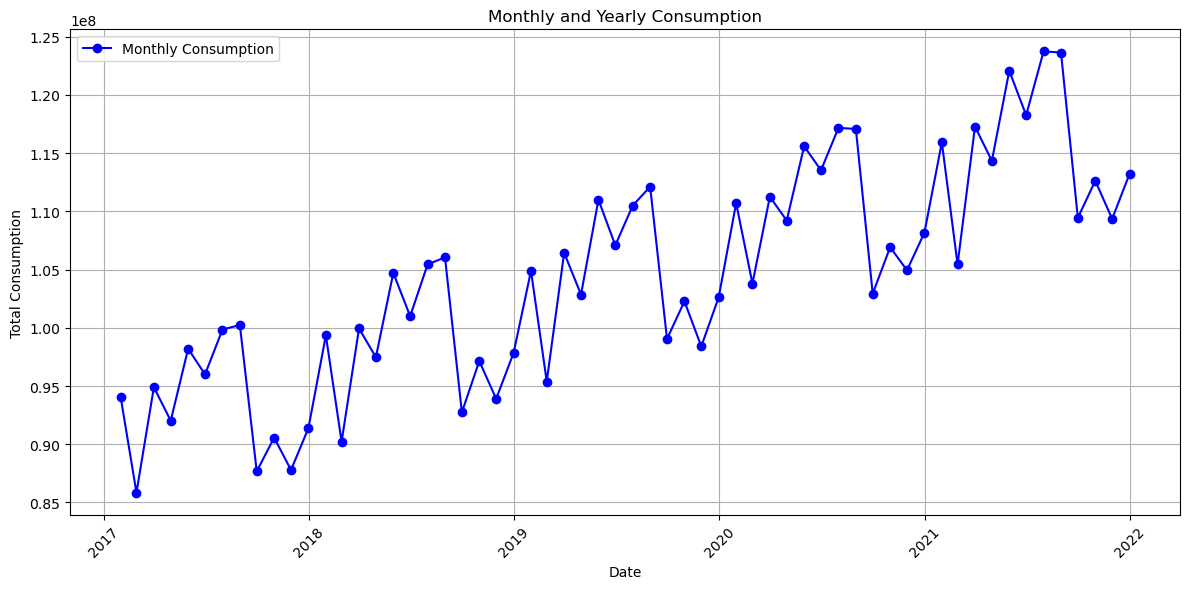

In [13]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the time series data
ax.plot(monthly_data.index, monthly_data['consumption'], marker='o', linestyle='-', color='b', label='Monthly Consumption')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Total Consumption')
ax.set_title('Monthly and Yearly Consumption')
ax.grid(True)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
import xgboost as xgb

In [15]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [16]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create additional features like year, month, day, and day of the week
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek


KeyError: 'date'

In [ ]:
# Define the features and target variable
X = df[['year', 'month', 'day', 'day_of_week']]
y = df['consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create an XGBoost regressor
model = xgb.XGBRegressor(n_estimators=10000,learning_rate=0.001)

# Train the model
model.fit(X_train, y_train,
          eval_set=[(X_train,y_train),(X_test,y_test)],verbose=100)


[0]	validation_0-rmse:240967.23631	validation_1-rmse:237374.45122


[100]	validation_0-rmse:220765.24712	validation_1-rmse:217330.64294
[200]	validation_0-rmse:202650.78334	validation_1-rmse:199480.11650
[300]	validation_0-rmse:186480.96229	validation_1-rmse:183589.59144
[400]	validation_0-rmse:172105.35919	validation_1-rmse:169498.12885
[500]	validation_0-rmse:159312.39542	validation_1-rmse:156966.19849
[600]	validation_0-rmse:147951.61340	validation_1-rmse:145840.07435
[700]	validation_0-rmse:137907.86904	validation_1-rmse:135996.01925
[800]	validation_0-rmse:129056.32715	validation_1-rmse:127336.95927
[900]	validation_0-rmse:121258.12428	validation_1-rmse:119717.67198
[1000]	validation_0-rmse:114307.40092	validation_1-rmse:112907.94908
[1100]	validation_0-rmse:108126.97966	validation_1-rmse:106886.42988
[1200]	validation_0-rmse:102687.00495	validation_1-rmse:101608.59487
[1300]	validation_0-rmse:97819.39864	validation_1-rmse:96876.64637
[1400]	validation_0-rmse:93589.71318	validation_1-rmse:92801.24200
[1500]	validation_0-rmse:89901.71925	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
features=pd.DataFrame(data=model.feature_importances_,index=model.feature_names_in_)

<Axes: title={'center': 'Features'}>

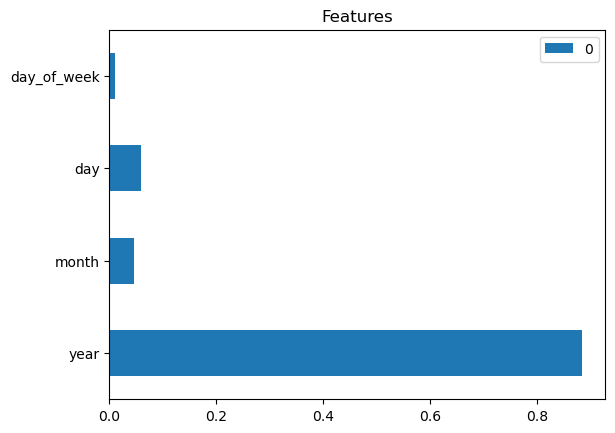

In [ ]:
features.plot(kind='barh',title='Features')

In [ ]:
# Define a date in the future for prediction
future_date = pd.to_datetime('2023-01-01')

# Create features for the future date
future_features = pd.DataFrame({
    'year': [future_date.year],
    'month': [future_date.month],
    'day': [future_date.day],
    'day_of_week': [future_date.dayofweek]
})

# Make predictions for the future date
future_prediction = model.predict(future_features)

print(f"Predicted consumption for {future_date}: {future_prediction[0]:.2f}")


Predicted consumption for 2023-01-01 00:00:00: 3783286.25


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Assuming you have already prepared your data and split it into X_train, y_train, X_test, and y_test as shown in the previous answer

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Initialize Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Initialize a list to store the evaluation results
eval_results = []

# Perform Time Series Cross-Validation
for train_index, val_index in tscv.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the training fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_pred_val = model.predict(X_val_fold)

    # Calculate the RMSE (Root Mean Squared Error) for the validation fold
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_val))
    eval_results.append(rmse)

# Calculate the average RMSE across all folds
average_rmse = np.mean(eval_results)

print(f'Average RMSE across all folds: {average_rmse:.2f}')


Average RMSE across all folds: 42031.54
